<a href="https://colab.research.google.com/github/Lucias86/Lucias86/blob/main/Copia_de_TP_INTEGRADOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grupo A1 ( *Noche*)**
***Integrantes:***

*Piancazza,Claudia Estefania,36660706*
\
*Serafini,Lucia,32666692*
\
*Etcheto,Martin,24791192*
\
*Leon,Brian Alfonzo,27466221*
\
*Nieva,Mabel Lucia,22414493*
\
*Pelizza,Diego Martin,30228466*
\
*Rilh,Pablo Ivan,37825276*
\
*Fiacchi,Melina,28507828*

Explicar el dataset elegido y que va a predecir

In [ ]:
#Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#cargamos dataset
df= pd.read_csv("/content/drive/MyDrive/precios-mercadocentral.csv", encoding="latin-1")
#df= pd.read_csv("/content/drive/MyDrive/DataSet/precios-fyh-mercadocentral-bsas-arg-2017-2c2018-.csv",encoding="latin-1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares


In [ ]:
df.tail(5) #Ver las ultimas filas

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
823,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Repollo,s/especificar,s/especificar,0.36,USD,Dolares
824,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Tomate,s/especificar,s/especificar,1.15,USD,Dolares
825,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zanahoria,s/especificar,s/especificar,0.29,USD,Dolares
826,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallito,s/especificar,s/especificar,1.01,USD,Dolares
827,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallo,s/especificar,s/especificar,0.32,USD,Dolares


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais_id        828 non-null    int64  
 1   pais           828 non-null    object 
 2   mercado        828 non-null    object 
 3   año            828 non-null    int64  
 4   mes            828 non-null    object 
 5   producto       828 non-null    object 
 6   variedad       828 non-null    object 
 7   origen         828 non-null    object 
 8   precio_usd_kg  767 non-null    float64
 9   moneda_cod     828 non-null    object 
 10  moneda         828 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 71.3+ KB


In [ ]:
#preproceso
df.isnull().sum()

pais_id           0
pais              0
mercado           0
año               0
mes               0
producto          0
variedad          0
origen            0
precio_usd_kg    61
moneda_cod        0
moneda            0
dtype: int64

In [ ]:
#limpieza y visualizacion de data limpio
df_limpio=df.dropna()
df_limpio

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares
...,...,...,...,...,...,...,...,...,...,...,...
823,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Repollo,s/especificar,s/especificar,0.36,USD,Dolares
824,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Tomate,s/especificar,s/especificar,1.15,USD,Dolares
825,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zanahoria,s/especificar,s/especificar,0.29,USD,Dolares
826,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallito,s/especificar,s/especificar,1.01,USD,Dolares


In [ ]:
df_limpio.describe()

,pais_id,año,precio_usd_kg
count,767.0,767.000000,767.000000
mean,32.0,2017.398957,1.262360
std,0.0,0.490003,1.437011
min,32.0,2017.000000,0.000000
25%,32.0,2017.000000,0.470000
50%,32.0,2017.000000,0.860000
75%,32.0,2018.000000,1.460000
max,32.0,2018.000000,11.230000


#########################################################


<ipython-input-30-94f12cb8e5a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[["pais_id","mercado","año","mes","producto","variedad","origen","precio_usd_kg","moneda_cod","moneda"]].corr()


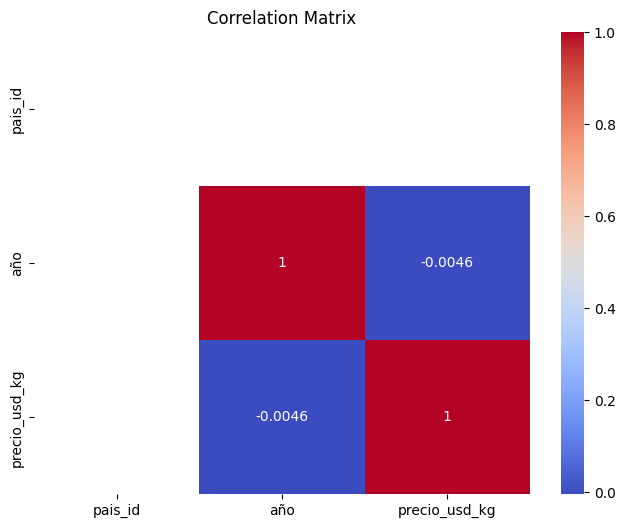

In [ ]:
import seaborn as snss
correlation_matrix = df[["pais_id","mercado","año","mes","producto","variedad","origen","precio_usd_kg","moneda_cod","moneda"]].corr()
plt.figure(figsize=(8, 6))
snss.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df = df_limpio
#Analizar los valores del atributo pais_id
pais_id = df['pais_id']
#Contamos los valores de frecuencia de pais_id
pais_id.value_counts()

32    767
Name: pais_id, dtype: int64

In [ ]:
#Analizar los valores del atributo producto
producto = df['producto']
#Contamos los valores de frecuencia de producto
producto.value_counts()

Tomate       41
Manzana      32
Banana       20
Frutilla     20
Limón        20
Mandarina    20
Naranja      20
Pera         20
Kiwi         20
Brocoli      19
Radicheta    19
Chaucha      19
Berenjena    19
Choclo       19
Epinaca      19
Batata       19
Papa         19
Pepino       19
Lechuga      19
Acelga       19
Arveja       19
Remolacha    19
Albahaca     19
Ajo          19
Pimiento     19
Repollo      19
Zanahoria    19
Zapallito    19
Melón        19
Zapallo      19
Perejil      19
Anana        18
Apio         18
Pomelo       18
Cebolla      17
Uva          17
Durazno      13
Frambuesa    10
PALTA         8
Palta         8
Ciruela       6
Cereza        3
Name: producto, dtype: int64

In [ ]:
#Como se observa esta dos veces el producto PALTA y Palta  por se rdatos sensibles a las mayusculas se los pasa los string a minusculas
df['producto'] = df['producto'].str.lower()
producto = df['producto']
#Contamos los valores de frecuencia de producto
producto.value_counts()


tomate       41
manzana      32
frutilla     20
limón        20
mandarina    20
naranja      20
pera         20
banana       20
kiwi         20
batata       19
brocoli      19
radicheta    19
chaucha      19
lechuga      19
choclo       19
epinaca      19
papa         19
pepino       19
berenjena    19
acelga       19
arveja       19
remolacha    19
albahaca     19
ajo          19
pimiento     19
repollo      19
zanahoria    19
zapallito    19
melón        19
zapallo      19
perejil      19
anana        18
apio         18
pomelo       18
cebolla      17
uva          17
palta        16
durazno      13
frambuesa    10
ciruela       6
cereza        3
Name: producto, dtype: int64

In [ ]:
#Analizar los valores del atributo variedad
variedad = df['variedad']
#Contamos los valores de frecuencia de variedad
variedad.value_counts()

s/especificar    434
Redondo           22
Eureka            12
Granny Smith      12
Red Delicius      12
Valenciana        12
Cavdich           12
Perita            11
Criolla           11
Amarillo          11
Esmeralda         11
Vta.Med.La        11
Arapey            11
1er.Corte         11
Spunta            11
Blanco            11
Cherry            11
Morron            11
Chantenay         11
Rocio Miel        11
Anc.Cokena        11
Star Ruby         10
Perola            10
Colorada           9
Moscat.Bca         9
Williams           8
Okitzu             8
Hass               8
Colorado           7
Blackamber         6
Eleg. Lady         5
Mdo. Chino         4
Encore             4
Packham's          4
Bing               3
Earlygrand         2
Name: variedad, dtype: int64

In [ ]:
#Revisar los valores de la variable precio
precio = df['precio_usd_kg']
precio.describe()

count    767.000000
mean       1.262360
std        1.437011
min        0.000000
25%        0.470000
50%        0.860000
75%        1.460000
max       11.230000
Name: precio_usd_kg, dtype: float64

In [ ]:
#Revisar los valores de la variable año
año = df['año']
año.value_counts()

2017    516
2018    312
Name: año, dtype: int64

In [ ]:
precio = df['precio_usd_kg']
precio.describe()


count    767.000000
mean       1.262360
std        1.437011
min        0.000000
25%        0.470000
50%        0.860000
75%        1.460000
max       11.230000
Name: precio_usd_kg, dtype: float64

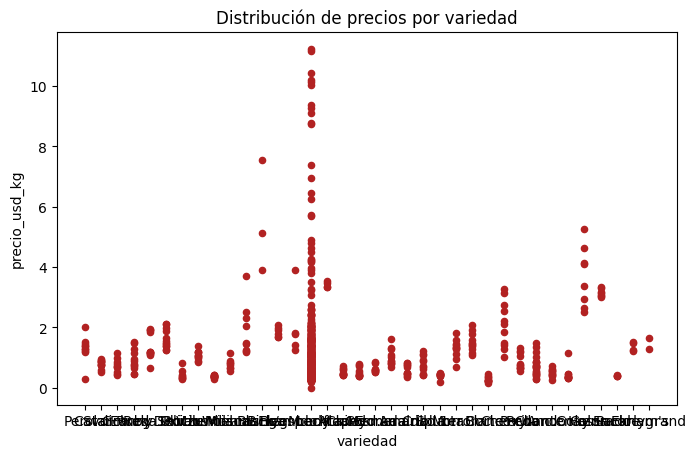

In [ ]:
# Gráfico la fruta y su precio
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 4.84))

df.plot(
    x    = 'variedad',
    y    = 'precio_usd_kg',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de precios por variedad');

# 4. Definir el X e Y y aplicar los modelos de Regresión Lineal Y **logista** **texto en negrita**

In [ ]:
df['año'] = df['año'].astype('str')
df['clase'] = df['producto'] +" " + df['variedad'] + " " + df['mes'] +  " " + df['año']
df


,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,clase
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,anana,Perola,Brasil,1.22,USD,Dolares,anana Perola Enero 2017
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,banana,Cavdich,Ecuador,0.53,USD,Dolares,banana Cavdich Enero 2017
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,pomelo,Star Ruby,Argentina,0.86,USD,Dolares,pomelo Star Ruby Enero 2017
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,limón,Eureka,Argentina,1.52,USD,Dolares,limón Eureka Enero 2017
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,manzana,Granny Smith,Argentina,1.84,USD,Dolares,manzana Granny Smith Enero 2017
...,...,...,...,...,...,...,...,...,...,...,...,...
823,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,repollo,s/especificar,s/especificar,0.36,USD,Dolares,repollo s/especificar Agosto 2018
824,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,tomate,s/especificar,s/especificar,1.15,USD,Dolares,tomate s/especificar Agosto 2018
825,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,zanahoria,s/especificar,s/especificar,0.29,USD,Dolares,zanahoria s/especificar Agosto 2018
826,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,zapallito,s/especificar,s/especificar,1.01,USD,Dolares,zapallito s/especificar Agosto 2018


In [ ]:
#Seleccionar la fruta Tomate del dataset para realizar la predicción
tomate = df[df['producto'] == 'tomate']

#Agregar una columna al dataset  la columna Id que identifica las caracteristicas para la X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

le = LabelEncoder()
tomate['Id'] = le.fit_transform(tomate['clase'])

# Obtener los valores asignados por el LabelEncoder
valores_asignados = le.transform(tomate['clase'].unique())

# Imprimir las correspondencias correctas
for i, clase in enumerate(tomate['clase'].unique()):
    print(f'clase: {clase} - Asignado: {valores_asignados[i]}')

clase: tomate Cherry Enero 2017 - Asignado: 2
clase: tomate Perita Enero 2017 - Asignado: 13
clase: tomate Redondo Enero 2017 - Asignado: 24
clase: tomate Cherry Febrero 2017 - Asignado: 3
clase: tomate Perita Febrero 2017 - Asignado: 14
clase: tomate Redondo Febrero 2017 - Asignado: 25
clase: tomate Cherry Marzo 2017 - Asignado: 6
clase: tomate Perita Marzo 2017 - Asignado: 17
clase: tomate Redondo Marzo 2017 - Asignado: 28
clase: tomate Cherry Abril 2017 - Asignado: 0
clase: tomate Perita Abril 2017 - Asignado: 11
clase: tomate Redondo Abril 2017 - Asignado: 22
clase: tomate Cherry Mayo 2017 - Asignado: 7
clase: tomate Perita Mayo 2017 - Asignado: 18
clase: tomate Redondo Mayo 2017 - Asignado: 29
clase: tomate Cherry Junio 2017 - Asignado: 5
clase: tomate Perita Junio 2017 - Asignado: 16
clase: tomate Redondo Junio 2017 - Asignado: 27
clase: tomate Cherry Julio 2017 - Asignado: 4
clase: tomate Perita Julio 2017 - Asignado: 15
clase: tomate Redondo Julio 2017 - Asignado: 26
clase: tom

<ipython-input-104-4f1aea386111>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tomate['Id'] = le.fit_transform(tomate['clase'])


In [ ]:
tomate.describe()

,pais_id,precio_usd_kg,Id
count,41.0,41.000000,41.000000
mean,32.0,1.185366,20.000000
std,0.0,0.722133,11.979149
min,32.0,0.390000,0.000000
25%,32.0,0.690000,10.000000
50%,32.0,1.010000,20.000000
75%,32.0,1.360000,30.000000
max,32.0,3.270000,40.000000


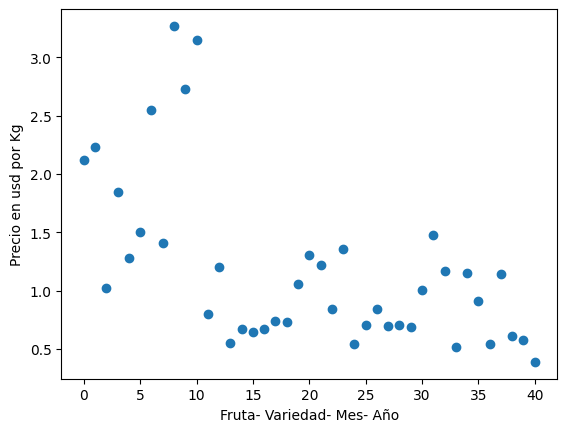

In [ ]:
X = tomate['Id']
Y = tomate['precio_usd_kg']
# Graficamos estos datos
plt.scatter(X, Y)
plt.xlabel("Fruta- Variedad- Mes- Año")
plt.ylabel('Precio en usd por Kg')
plt.show()

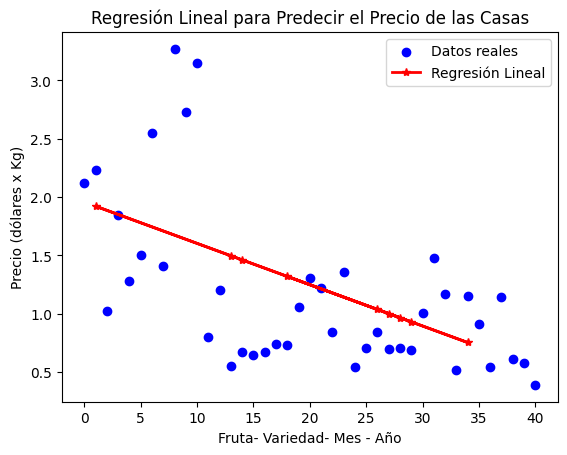

In [ ]:

# División de los datos en train y test
X = tomate['Id']
Y = tomate['precio_usd_kg']


X_train, X_test, y_train, y_test = train_test_split( X.values.reshape(-1,1), Y.values.reshape(-1,1), train_size = 0.8, random_state = 1234, shuffle = True)

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

precio_prediccion = modelo.predict(X_test)

# ==============================================================================
# Visualizar los resultados
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X_test, precio_prediccion, color='red', marker='*',linewidth=2, label='Regresión Lineal')
plt.xlabel('Fruta- Variedad- Mes - Año')
plt.ylabel('Precio (dólares x Kg)')
plt.legend()
plt.title('Regresión Lineal para Predecir el Precio de las Casas')
plt.show()


In [ ]:
#calcular la correlacion
correlacion = np.corrcoef(X.ravel(), Y.ravel())[0,1]
print(correlacion)
#nmp = X.values
#print(nmp)
print(X.ravel())
print(Y.ravel())
X1 = X.ravel()
Y1 = Y.ravel()

-0.5734617306150313
[ 2 13 24  3 14 25  6 17 28  0 11 22  7 18 29  5 16 27  4 15 26  1 12 23
 10 21 32  9 20 31  8 19 30 35 36 39 33 40 38 37 34]
[1.02 0.55 0.54 1.85 0.67 0.71 2.55 0.74 0.71 2.12 0.8  0.84 1.41 0.73
 0.69 1.5  0.67 0.7  1.28 0.65 0.84 2.23 1.2  1.36 3.15 1.22 1.17 2.73
 1.31 1.48 3.27 1.06 1.01 0.91 0.54 0.58 0.52 0.39 0.61 1.14 1.15]


In [ ]:
model = LinearRegression()
model.fit(X1.reshape(-1,1), Y1)

# Información del modelo
# ==============================================================================
print("Intercept:", model.intercept_)
print("Coeficiente:", model.coef_.flatten())
#print("Coeficiente:", list(zip(X.columns, model.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", model.score(X, Y))

# Realizar predicciones
X2=X1.reshape(-1, 1)
precio_prediccion = model.predict(X2)

# ==============================================================================
# Visualizar los resultados
plt.scatter(X1, Y1, color='blue', label='Datos reales')
plt.plot(X1, precio_prediccion, color='red', marker='*',linewidth=2, label='Regresión Lineal')
plt.xlabel('Fruta- Variedad- Mes - Año')
plt.ylabel('Precio (dólares x Kg)')
plt.legend()
plt.title('Regresión Lineal para Predecir el Precio de las Casas')
plt.show()


Intercept: 1.876759581881533
Coeficiente: [-0.03456969]


ValueError: ignored

In [ ]:
# Información del modelo
# ==============================================================================
print(f"intercept: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")

#print("Coeficiente:", list(zip(X1.columns, model.coef_.flatten(), )))
r_sq = model.score(X1, Y1)
print(f"coefficient of determination: {r_sq}")


intercept: 1.876759581881533
slope: [-0.03456969]
Intercept: 1.876759581881533


ValueError: ignored

# **Modelo de Regresión Logística**

Queremos predecir si un tomate es Redondo o Perita a partir de su precio.

In [ ]:
# Tomamos los precios de los tomates peritas y redondos
values = ['Perita', 'Redondo']
tomate_red_per = tomate[tomate.variedad.isin(values)]
tomate_red_per
precios = tomate_red_per['precio_usd_kg']
tipo = (tomate_red_per['variedad'] == "Perita").astype(int)
tipo

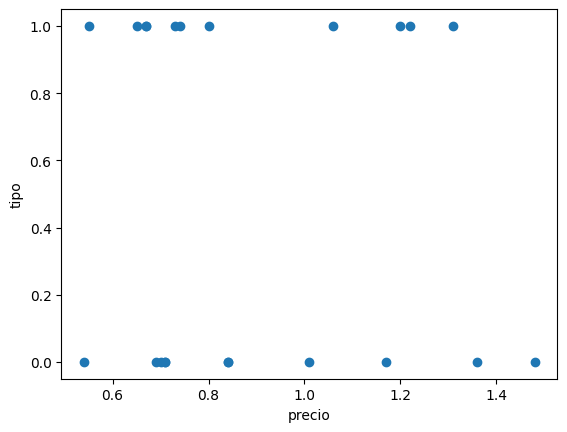

In [ ]:
precios = tomate_red_per['precio_usd_kg']
tipo = (tomate_red_per['variedad'] == "Perita").astype(int)
# Graficamos estos datos
plt.scatter(precios, tipo)
plt.xlabel('precio')
plt.ylabel('tipo')
plt.show()

In [ ]:
print(precios.min())
print(precios.max())

precios_no_outlier = precios.values[:-1]
tipo_no_outlier = tipo.values[:-1]

x_range = np.linspace(1.5, 0.5, 100).reshape(-1, 1)
x_range

0.54
1.48


array([[1.5       ],
       [1.48989899],
       [1.47979798],
       [1.46969697],
       [1.45959596],
       [1.44949495],
       [1.43939394],
       [1.42929293],
       [1.41919192],
       [1.40909091],
       [1.3989899 ],
       [1.38888889],
       [1.37878788],
       [1.36868687],
       [1.35858586],
       [1.34848485],
       [1.33838384],
       [1.32828283],
       [1.31818182],
       [1.30808081],
       [1.2979798 ],
       [1.28787879],
       [1.27777778],
       [1.26767677],
       [1.25757576],
       [1.24747475],
       [1.23737374],
       [1.22727273],
       [1.21717172],
       [1.20707071],
       [1.1969697 ],
       [1.18686869],
       [1.17676768],
       [1.16666667],
       [1.15656566],
       [1.14646465],
       [1.13636364],
       [1.12626263],
       [1.11616162],
       [1.10606061],
       [1.0959596 ],
       [1.08585859],
       [1.07575758],
       [1.06565657],
       [1.05555556],
       [1.04545455],
       [1.03535354],
       [1.025

Text(0, 0.5, 'tipo')

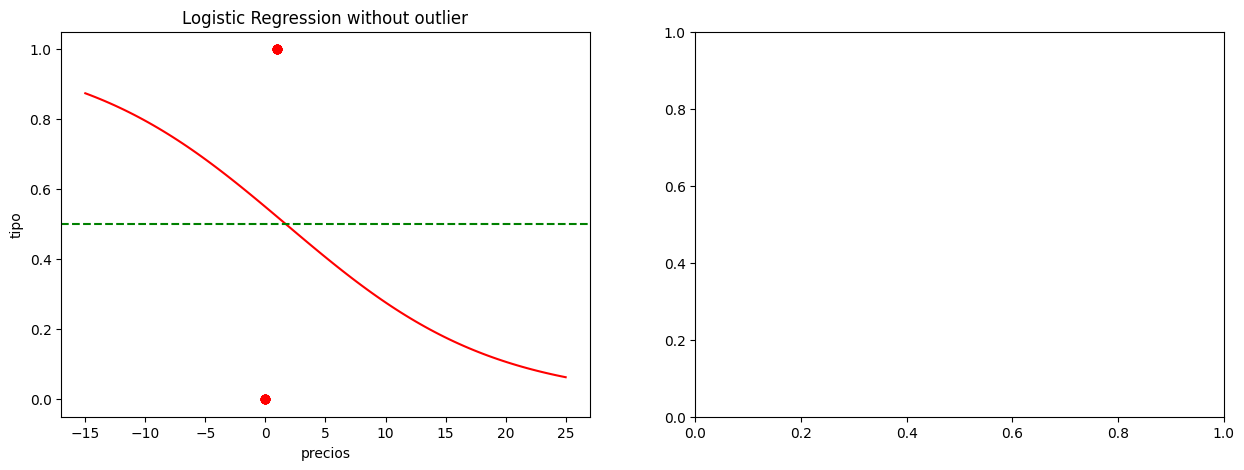

In [ ]:
from sklearn.linear_model import LogisticRegression

# Removemos el outlier
precios_no_outlier = precios.values[:-1]
tipo_no_outlier = tipo.values[:-1]

# Cambiamos la forma de los vectores para que lo acepte nuestro modelo
precios_no_outlier_re = precios_no_outlier.reshape(-1, 1)
tipo_no_outlier_re = tipo_no_outlier.reshape(-1, 1)

# Inicializamos el modelo de regresion logistica
#log_reg = LogisticRegression(solver='liblinear')
log_reg = LogisticRegression()
# Entrenamos el modelo sin el outlier
log_reg.fit(precios_no_outlier_re, np.ravel(tipo_no_outlier))

# Hacemos predicciones
x_range = np.linspace(-15, 25, 100).reshape(-1, 1)

predictions_no_outlier = log_reg.predict_proba(precios.values.reshape(-1,1))[:,1]
function_predictions = log_reg.predict_proba(x_range)[:,1]

# Clasificamos los tipos de tomates
threshold = 0.5
classifications = (predictions_no_outlier > threshold).astype(int)

# Definimos colores y formas basados en la clasificacion
colors = ['red' if classification else 'blue' for classification in classifications]
markers = ['o' if classification else 's' for classification in classifications]

# Ploteamos los datos sin el outlier
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


for i in range(len(precios_no_outlier)):
    axs[0].scatter(tipo_no_outlier[i], tipo_no_outlier[i], color=colors[i], marker=markers[i])

axs[0].plot(x_range, function_predictions, color='red')
axs[0].axhline(y=threshold, color='green', linestyle='--')
axs[0].set_title('Logistic Regression without outlier')
axs[0].set_xlabel('precios')
axs[0].set_ylabel('tipo')


In [ ]:
# Inicializamos el modelo de regresion logistica
log_reg = LogisticRegression(solver='liblinear')

# Cambiamos la forma de los vectores para que lo acepte nuestro modelo
precios_no_outlier_re = precios_no_outlier.reshape(-1, 1)
tipo_no_outlier_re = tipo_no_outlier.reshape(-1, 1)

# Entrenamos el modelo sin el outlier
log_reg.fit(precios_no_outlier_re, np.ravel(tipo_no_outlier_re))

# Hacemos predicciones
x_range = np.linspace(-15, 25, 100).reshape(-1, 1)
predictions_no_outlier = log_reg.predict_proba(precios.reshape(-1,1))[:,1]
function_predictions = log_reg.predict_proba(x_range)[:,1]

# Clasificamos los tumores como benignos o malignos segun nuestro valor umbral
threshold = 0.5
classifications = (predictions_no_outlier > threshold).astype(int)

# Definimos colores y formas basados en la clasificacion
colors = ['red' if classification else 'blue' for classification in classifications]
markers = ['o' if classification else 's' for classification in classifications]

# Ploteamos los datos sin el outlier
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


for i in range(len(precios_no_outlier)):
    axs[0].scatter(tipo_no_outlier[i], tipo_no_outlier[i], color=colors[i], marker=markers[i])

axs[0].plot(x_range, function_predictions, color='red')
axs[0].axhline(y=threshold, color='green', linestyle='--')
axs[0].set_title('Logistic Regression without outlier')
axs[0].set_xlabel('precios')
axs[0].set_ylabel('tipo')

# Volvemos a agregar al outlier a nuestro set de datos
tumor_sizes = np.append(precios_no_outlier, 20).reshape(-1, 1)
tumor_types = np.append(tipo_no_outlier, 1).reshape(-1, 1)

log_reg.fit(precios, np.ravel(tipo))

# Hacemos predicciones incluyendo ahora al outlier
x_range = np.linspace(-15, 25, 100).reshape(-1, 1)
predictions = log_reg.predict_proba(precios.reshape(-1,1))[:,1]
function_predictions_out = log_reg.predict_proba(x_range)[:,1]


classifications = (predictions> threshold).astype(int)

# Definimos los colores basados en la clasificacion
colors = ['red' if classification else 'blue' for classification in classifications]
markers = ['o' if classification else 's' for classification in classifications]

# Graficamos los resultados con el outlier o valor anomalo

for i in range(len(precios)):
    plt.scatter(precios[i], tipo[i], color=colors[i], marker=markers[i])
    #plt.scatter(precios[i], tipo[i], color=colors[i], marker=markers[i])

axs[1].plot(x_range, function_predictions, color='red')
axs[1].axhline(y=threshold, color='green', linestyle='--')
axs[1].set_title('Regresion logistica con el outlier')
axs[1].set_xlabel('Precio')
axs[1].set_ylabel('Tipo')


plt.show()

In [ ]:
#Analizar los valores del atributo variedad
variedad = tomate['variedad']
#Contamos los valores de frecuencia de variedad
variedad.value_counts()

Cherry           11
Perita           11
Redondo          11
s/especificar     8
Name: variedad, dtype: int64